## Domain: Airlines
## Project: Analyze NYC-Flight data
#### This dataset contains information about all flights that departed from NYC (e.g.EWR, JFK and LGA) in 2013: 336,776 flights in total. 
##### The following are the types of question I have keen interest on:

## Exploration ideas:

   #### 1. Departure delays.
   #### 2. Best airports in terms of time departure%.
   #### 3. Aircraft speed analysis.
   #### 4. On time arrival % analysis.
   #### 5. Maximum number of flights headed to any particular destination.
   #### 6. Other factors affecting flight delays seasonal(summer, winter) 
   #### 7. Weather affecting flight delays 
   #### 8. Findings and conclusion

   ## Index
   #### 1. Loading Required libraries and Data set  
   #### 2. Understanding and Analyzing Data using Data Profiling
   #### 3. Answering Business questions
   #### 4. Grouping the data according to the requirement
   #### 5. Data profile again 
   #### 6. Draw conclusions and Findings       

### 1.Loading up all libraries and importing Data from local drive

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import pandas_profiling 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the flights data from the local drive 
flights = pd.read_csv("flight_data.csv")

In [3]:
#Just to see the shape, columns and datatypes of our dataset 

print(flights.shape)
print(flights.columns)
print(flights.dtypes)

(336776, 19)
Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object


In [4]:
# Displaying first five lines of the data
flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


#### Conclusion: Succefully loaded the data and assigned it to 'flights' variable and displayed the sample data 

## 2. Understanding and Analyzing Data using Data Profiling

In [5]:
#Quick profiling of the data to see all insights of our dataset

pandas_profiling.ProfileReport(flights)   # Inside notebook 

#report = pandas_profiling.ProfileReport(flight) 
#report.to_file("flight.html")   # Saves report at base directory 

Number of variables,19
Number of observations,336776
Total Missing (%),0.6%
Total size in memory,42.4 MiB
Average record size in memory,132.0 B
Numeric,9
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,5


**we have initial report from profiling of our data set** 

 > _We have some rejections, zeros, missing and warnings across all variables_ 

- air_time has 9430 / 2.8% missing values Missing
- arr_delay is highly correlated with dep_delay (ρ = 0.9148) Rejected
- arr_time has 8713 / 2.6% missing values Missing
- dep_delay has 16514 / 4.9% zeros Zeros
- dep_delay has 8255 / 2.5% missing values Missing
- dep_time has 8255 / 2.5% missing values Missing
- dest has a high cardinality: 105 distinct values Warning
- distance is highly correlated with air_time (ρ = 0.99065) Rejected
- hour is highly correlated with sched_dep_time (ρ = 0.99915) Rejected
- minute has 60696 / 18.0% zeros Zeros
- sched_dep_time is highly correlated with dep_time (ρ = 0.95462) Rejected
- tailnum has a high cardinality: 4044 distinct values Warning
- time_hour has a high cardinality: 6936 distinct values Warning
- year has constant value 2013 Rejected

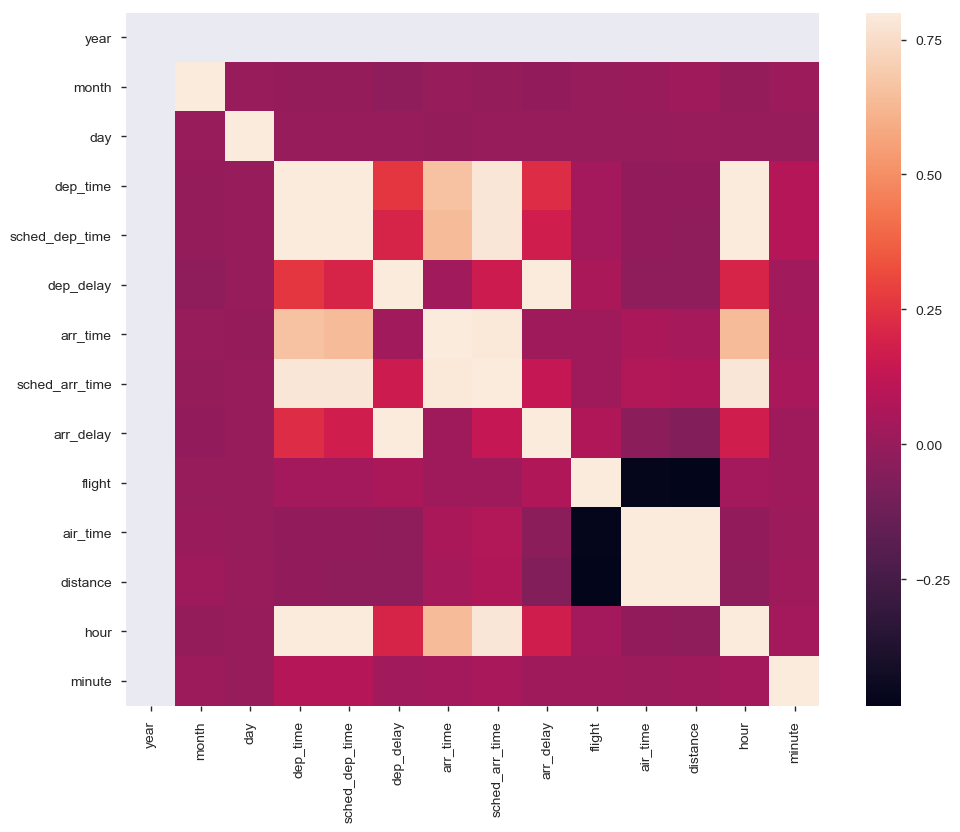

In [6]:
#correlation matrix using heat Map 
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#### Conclusion:
#### Through the correlation matrix we can see how some of the 15 variables in the dataset present multicollinearity, in other words, can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones.

## 3. Business Questions (1 to 6)

#### Let’s explore flights information from NYC to Seattle in 2013,to answer the following questions.

**(a) How many flights were there from NYC airports to Seattle in 2013 ?**

In [7]:
# Unique origin of our Flight data 
flights.origin.unique() # we have 3 airports in NYC 

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [8]:
dest_seattle = flights['dest']=='SEA'
len(flights[dest_seattle])

3923

**Conclusion: There are 3923 flights from NYC to Seattle in 2013**

**(b). How many airlines fly from NYC to Seattle in 2013 ?**

In [9]:
flights_seattle = flights[dest_seattle]
len(flights_seattle['carrier'].unique())

5

**Conclusion: There are 5 airlines flies from NYC to Seattle based on our dataset**

**(c). How many unique aircrafts fly from NYC to Seattle ? **

In [10]:
flights_seattle['tailnum'].nunique() # Calculating number of unique air planes

935

**Conclusion: There are 935 unique aircrafts fly from NYC to Seattle **

**(d). What is the average arrival delay for flights from NYC to Seattle ?**

In [11]:
flights_seattle['arr_delay'].mean() # mean arrival delay

-1.0990990990990992

**Conclusion: -1.099 is the average arrival  delay for flights from NYC to Seattle i.e on an average, the flights arrive about a minute early.**

**(e).What proportion of flights to Seattle come from each NYC airport ?**

In [12]:
# NYC Airports are JFK, EWR and LGA 
# subsetting the flights from these airports to Seattle (SEA)

print(flights_seattle.groupby('origin').size()/flights_seattle['flight'].count()) 

origin
EWR    0.466735
JFK    0.533265
dtype: float64


**Conclusion: The proportion of flights to Seattle from EWR and JFK is 0.47 and 0.53 i.e 47% and 53% respectively.**

**In 2013, the flights from NYC airports to Seattle were split as follows:**

**1. 46.67% from the EWR airport (Newark Liberty International Airport) **

**2. 53.32% from the JFK airport (John F. Kennedy International Airport)**

** 3. 0% from the LGA airport (LaGuardia Airport) **

## Question 2
__Flights are often delayed. Lets Consider the following questions to explore the delay patters.__

**(a).Overall Delay Percentage of the flights using Pie Chart **

In [13]:
#Status represents wether the flight was on time (0), slightly delayed (1) and highly delayed (2)
for dataset in flights:
    flights.loc[flights['arr_delay'] <= 15, 'Status'] = 0
    flights.loc[flights['arr_delay'] >= 15, 'Status'] = 1
    flights.loc[flights['arr_delay'] >= 60, 'Status'] = 2

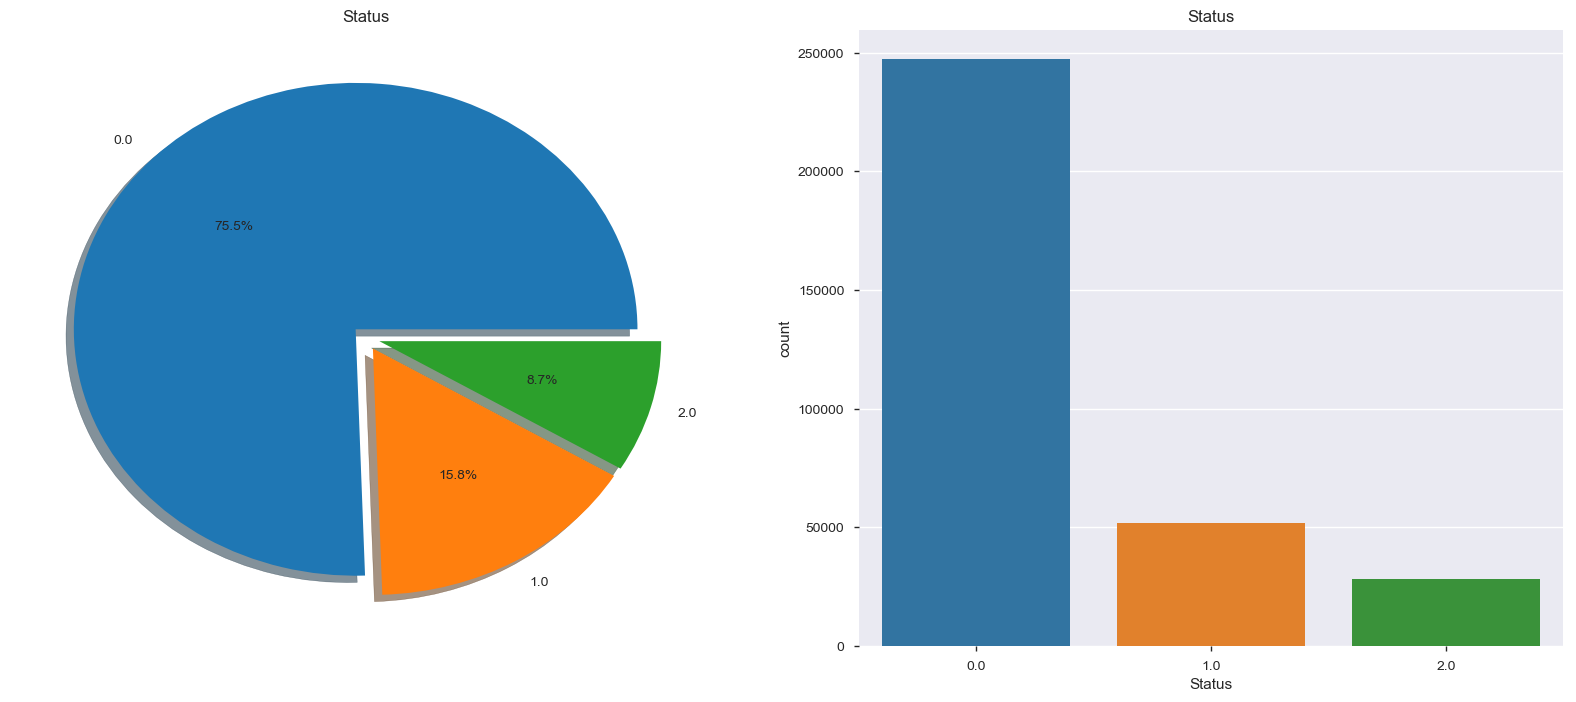

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2)


In [14]:
f, ax=plt.subplots(1,2,figsize=(20,8))
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2)')

**Conclusion: overall 75 % flights are ON TIME, 15 % SLIGHTLY DELAYED  and 8 % HIGHLY DELAYED **

**(b). Which date has the largest average departure delay?   Which date has the largest average arrival delay?**


In [15]:
#Calculating and grouping the flights based on departure delay date

flights_grp_dd = flights.groupby(['month','day'],as_index = False).agg({'dep_delay':'mean'})
max_dep_delay = flights_grp_dd['dep_delay'].max()
print(flights_grp_dd[flights_grp_dd['dep_delay']== max_dep_delay])

#Calculating and grouping the flights based on arrival delay date

flights_grp_ad = flights.groupby(['month','day'],as_index = False).agg({'arr_delay':'mean'})
max_arr_delay = flights_grp_ad['arr_delay'].max()
print(flights_grp_ad[flights_grp_ad['arr_delay']== max_arr_delay])

    month  day  dep_delay
66      3    8  83.536921
    month  day  arr_delay
66      3    8  85.862155


**Conclusion: The largest average departure(83.5369 min) and arrival delay(85.8622) was on 8th of March 2013**

**(c).What was the Worst and Best day to fly out of NYC in 2013?**

In [16]:
#Worst day is the day with maximum number of delayed flights(flights with positive departure delay)

flights_grp_dd = flights[flights['dep_delay']>0].groupby(['month','day'],as_index = False).agg({'flight':'count'})
#print(flights_grp_dd)

max_delayed_flights = flights_grp_dd['flight'].max()
print(flights_grp_dd[flights_grp_dd['flight']  == max_delayed_flights])

     month  day  flight
356     12   23     674


**Conclusion: Worst day to fly out of NYC in 2013 was 23rd of December with 674 flights having a delayed departure from NYC.**

In [17]:
#Best day is the day with minimum number of delayed flights(flights with negative or less departure delay)

flights_grp_dd = flights[flights['dep_delay']<0].groupby(['month','day'],as_index = False).agg({'flight':'count'})
#print(flights_grp_dd)

min_delayed_flights = flights_grp_dd['flight'].min()
print(flights_grp_dd[flights_grp_dd['flight']  == min_delayed_flights])

    month  day  flight
39      2    9     114


**Conclusion: Best day to fly out of NYC in 2013 was 9th of Feb with 114 flights having minimum delayed departure from NYC.**

**(d).On an average, how do departure delays vary over the course of a day ? ** 

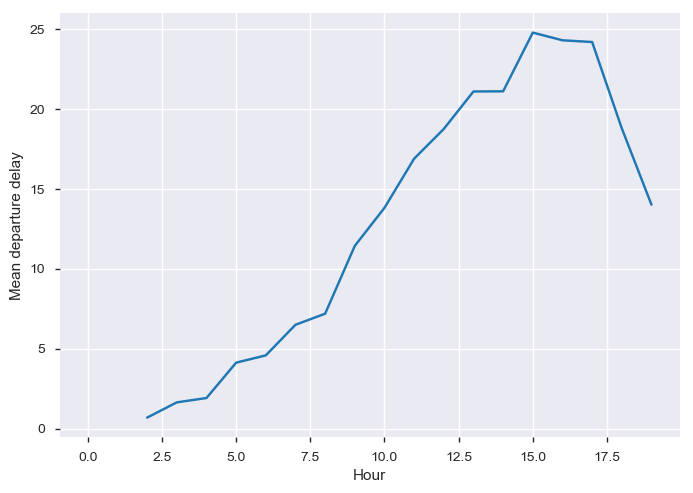

In [19]:
#flights = pd.read_csv('flights_data.csv') 

flights.loc[flights.hour == 12 ,'hour'] = 0
delay_grp = flights.groupby(['hour'],as_index = False).agg({'dep_delay':'mean'})
delay_grp['dep_delay'].plot()
plt.xlabel('Hour')
plt.ylabel('Mean departure delay')
plt.show()

#flights['dep_delay'].hist(by=flights['hour'])  #departure delay by hourly

**conclusion: On an average, the departure delays are at a peak during 3 pm, there is a small peak. **

**(e). Calculating Every Carrier Delay and Visualise using bar and box plot**

In [21]:
flights.describe() #Checking the statistics of the data set to draw some plots for Mean arrival delays of each airlines 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,Status
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000,327346.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,12.532422,26.230100,0.331200
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,5.532748,19.300846,0.628106
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,0.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,8.000000,8.000000,0.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000,0.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000,0.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,2.000000


In [22]:
print(flights['carrier'].value_counts())

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64


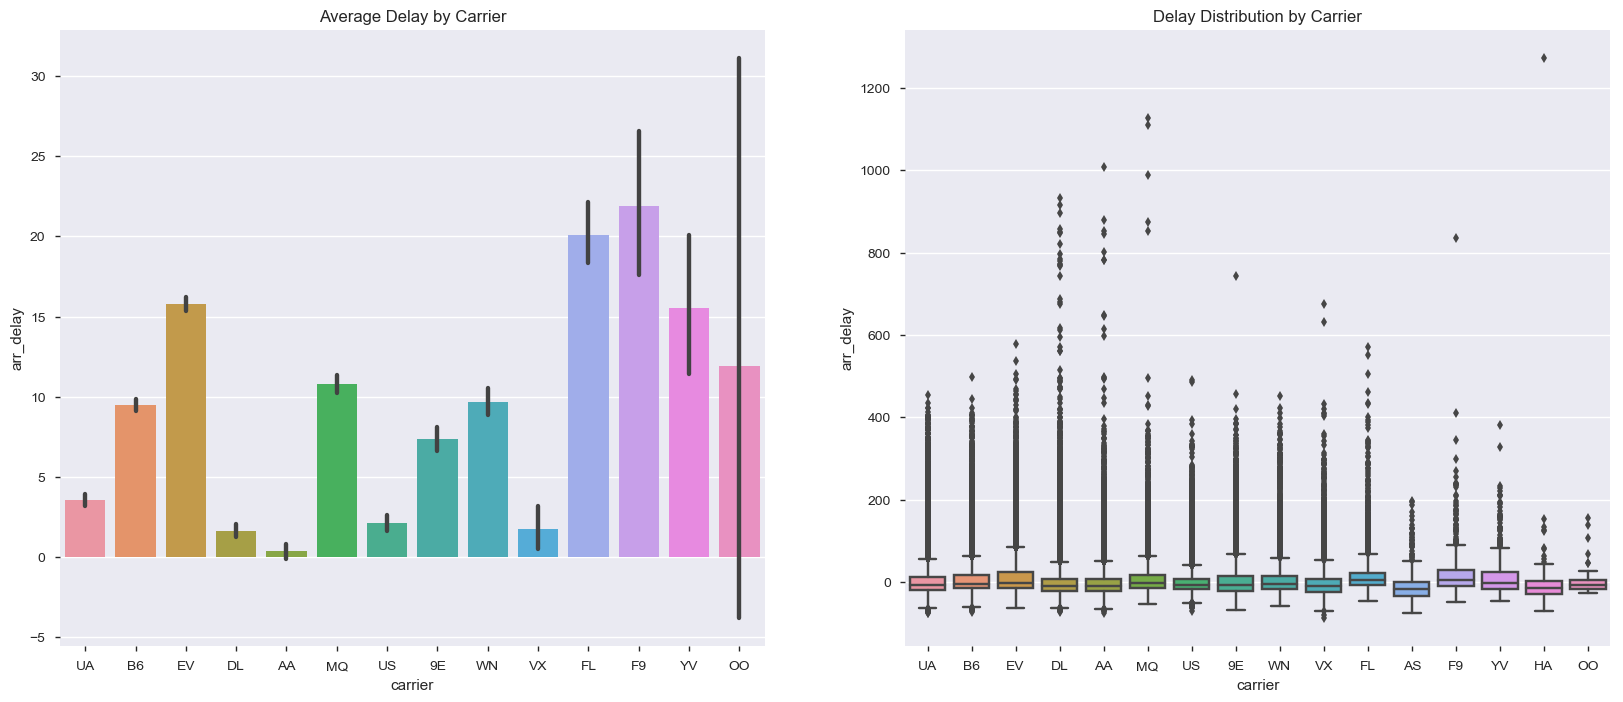

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [23]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=flights,ax=ax[0], order=['UA', 'B6', 'EV', 'DL','AA','MQ','US','9E',                              
                                                                    'WN','VX','FL','F9','YV','OO'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=flights,ax=ax[1], order=['UA', 'B6', 'EV', 'DL','AA','MQ','US','9E',                                                                          
                                                                    'WN','VX','FL','AS','F9','YV','HA','OO'])                                                                         
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

#### Conclusion:
#### 4 from the top 5 companies in the domestic market American Airlines (AA), US Airways (US), Delta Airlines(DL) and United Airlines (UA) create an average delay below (6 minutes). American Airlines (AA), with an outstanding 2.5 minutes per flight lowest of all the carriers.
#### Carriers with higher average delay generation are Skywest Airlines (OO) with 32.63 minutes per flight, Mesa Airlines (YV) with 20 minutes per flight and Frontier Airlines (F9) with 18. As we go from left to right in the barplot, it can be seen how airlines with lower volumes of flights tend to have a higher Carrier Delay, so it seems like size matters.
#### On the other hand, taking responsibility of a higher number of flights results in a higher chance of having an extreme waiting situation. Skywest Airlines (OO), Mesa Airlines (YV) and Frontier Airlines (F9) maximum Carrier Delay for 2013

### Question 3
**Which flight departing NYC in 2013 flew the fastest? **

In [24]:
# Fastest flight = Flight details with the max speed
# Speed = distance/time = distance in miles/airtime in hr = distance in miles/(airtime in min/60)

flights['speed'] = flights.distance/(flights.air_time/60)
max_speed = max(flights['speed'])
flights[flights['speed']== max_speed]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,Status,speed
216447,2013,5,25,1709.0,1700,9.0,1923.0,1937,-14.0,DL,...,N666DN,LGA,ATL,65.0,762,17,0,25-05-2013 17:00,0.0,703.384615


**Conclusion: The fastest flight (Flight no - 1499, Tailnum - N666DN) flew from LGA to ATL on 25th of May at 5 pm with a speed of 703.38 miles/hr.**

### Question.4
**Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?**

In [25]:
#To find the carrier+flight+dest combination which flies every day of the year. Also find the destination of the flight.#To find 

flights['unique_day'] = pd.factorize(flights.month+flights.day)[0]
flights_count = flights.groupby(['flight','carrier','dest'],as_index = False).agg({'unique_day':'count'})
print(len(flights_count[flights_count['unique_day']>=365]))
print(flights_count[flights_count['unique_day']>=365].dest.unique())

18
['HNL' 'SFO' 'LAX' 'CLT' 'LAS' 'BUR' 'FLL' 'SRQ' 'SJU' 'MIA' 'MCO' 'TPA'
 'IAD']


**Conclusion: There are 18 flights which fly every day. They fly to 'HNL' 'SFO' 'LAX' 'CLT' 'LAS' 'BUR' 'FLL' 'SRQ' 'SJU' 'MIA' 'MCO' 'TPA' 'IAD'**

### Question.5
**Here I am addressing some questions using the nyc flights 2013 dataset and provide visualizations to support my exploration of it.**

#### Among the flights that fly to Seattle

**1. On an average how does the departure & arrival delay look like for every carrier? **

**2. Do you see a specific carrier which has a very high average?**

  carrier  dep_delay
0      AA  10.041551
1      AS   5.804775
2      B6  11.592593
3      DL   7.391376
4      UA  17.315647


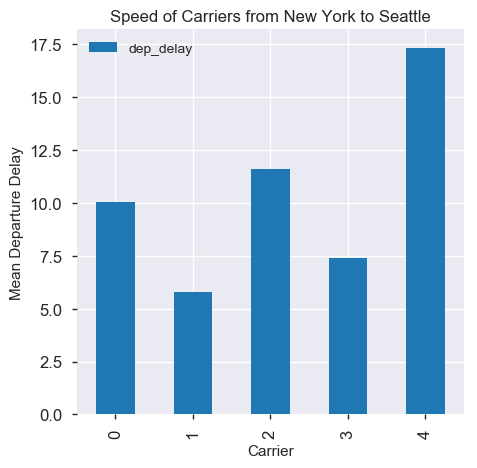

  carrier  arr_delay
0      AA  -1.475000
1      AS  -9.930889
2      B6   7.721248
3      DL  -5.886023
4      UA   5.827430


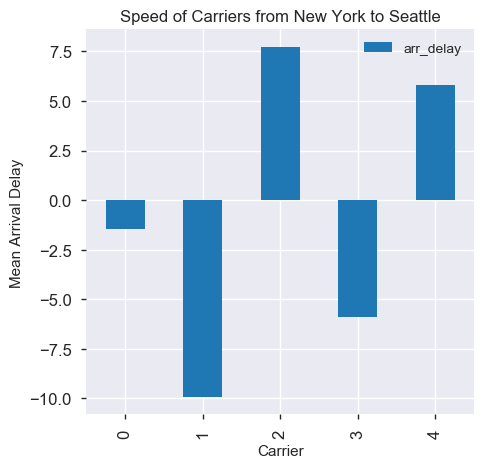

In [26]:
flights_speed_dep = flights_seattle.groupby(['carrier'],as_index = False).agg({'dep_delay':'mean'})
print(flights_speed_dep)

flights_speed_dep.plot(kind='bar', title ="Speed of Carriers from New York to Seattle",figsize=(5,5),legend=True, fontsize=12)
plt.xlabel('Carrier')
plt.ylabel('Mean Departure Delay')
plt.show()
plt.close()

flights_speed_arr = flights_seattle.groupby(['carrier'],as_index = False).agg({'arr_delay':'mean'})
print(flights_speed_arr)

flights_speed_arr.plot(kind='bar', title ="Speed of Carriers from New York to Seattle",figsize=(5,5),legend=True, fontsize=12)
plt.xlabel('Carrier')
plt.ylabel('Mean Arrival Delay')
plt.show()
plt.close()

**Conclusion**

**From the bar graph, we see that United Airlines has the highest average departure delay to Seattle. Also, Alaska Airlines has the least average departure delay of all.**

**From the bar graph, we see that JetBlue has the highest average arrival delay to Seattle while Alaska Airlines has a negative average, implying that on an average, Alaskan Airlines arrive earlier than expected.**

**Thus from this analysis, we can say that Alaskan Airlines fares the best in terms of average delays to Seattle, if you dislike delayed flights.**

In [45]:
#Second profiling 
pandas_profiling.ProfileReport(flights) 

Number of variables,22
Number of observations,336776
Total Missing (%),0.8%
Total size in memory,48.8 MiB
Average record size in memory,152.0 B
Numeric,12
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,5


## Question 6.
#### Are there any seasonal and climatic patterns in departure delays for flights from NYC?

In [27]:
import datetime
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf
%matplotlib inline

#### 1.Finding out seasonal patterns in departure delays for flights from NYC?

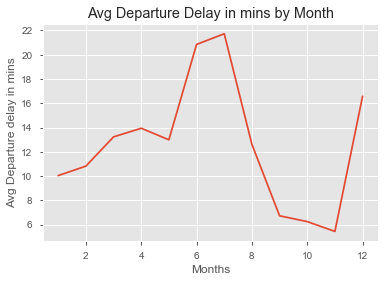

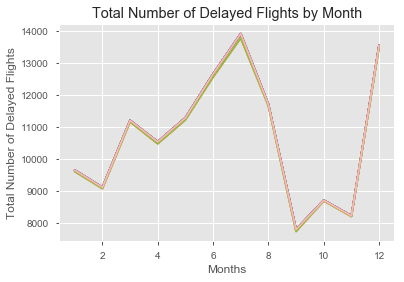

In [35]:
# Exploring the seasonal patterns in average departure delay in mins by Month

flights.head()
matplotlib.style.use('ggplot') 
plt.plot(flights.groupby('month')['dep_delay'].mean())
plt.xlabel('Months', size = 12)
plt.ylabel('Avg Departure delay in mins', size = 12)
plt.title('Avg Departure Delay in mins by Month')
plt.show()

# Exploring the seasonal patterns in total number of delayed by Month
plt.plot(dep_delay.groupby('month').count())
plt.xlabel('Months', size = 12)
plt.ylabel('Total Number of Delayed Flights', size = 12)
plt.title('Total Number of Delayed Flights by Month')
plt.show()

**Conclusion: Yes, there seem to be some evident patterns in the flight departure delays. Mostly, the holiday season shows spike in the mean flight departure delay time during the months of June, July and December. These months have the highest average of delayed mins.**

**Also, the second graph shows the total number of flights delayed in a given month, July and December seem to stand out with most number of delayed flights in total. This ties back directly to the Summer and winter break that people take during these months of the year in terms of season.**

**2. What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.**



Index(['month', 'day', 'dep_delay', 'temp', 'humid', 'visib', 'dewp',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure'],
      dtype='object')


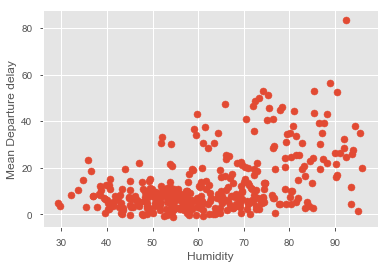

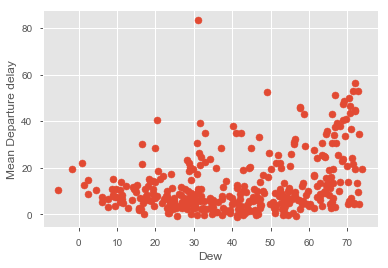

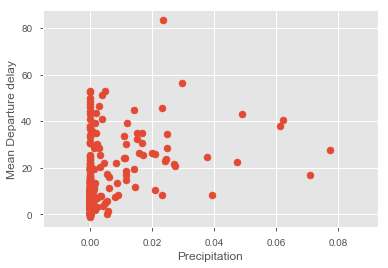

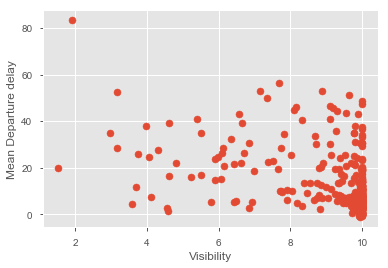

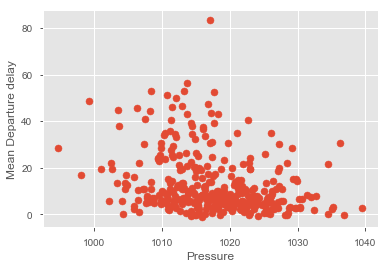

In [36]:
#What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.
#For weather data i have downloaded this data set online 

weather_df = pd.read_csv('weather.csv')
weather_df
combined_df = pd.merge(flights,weather_df, how = 'left', on = ['origin','year','month','day','hour'])

#print(combined_df.head())
combined_df = combined_df[['month','day','dep_delay','temp','humid','visib','dewp','wind_dir','wind_speed','wind_gust','precip','pressure']]
wea_temp_day_df = combined_df.groupby(['month','day'],as_index = False).agg({'dep_delay':'mean','temp':'mean','humid':'mean','visib':'mean','dewp':'mean','wind_dir':'mean','wind_speed':'mean','wind_gust':'mean','precip':'mean','pressure':'mean'})
print(wea_temp_day_df.columns)

plt.scatter(wea_temp_day_df['humid'], wea_temp_day_df['dep_delay'])
plt.xlabel('Humidity')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(wea_temp_day_df['dewp'], wea_temp_day_df['dep_delay'])
plt.xlabel('Dew')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(wea_temp_day_df['precip'], wea_temp_day_df['dep_delay'])
plt.xlabel('Precipitation')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()


plt.scatter(wea_temp_day_df['visib'], wea_temp_day_df['dep_delay'])
plt.xlabel('Visibility')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(wea_temp_day_df['pressure'], wea_temp_day_df['dep_delay'])
plt.xlabel('Pressure')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

**Conclusions: There seems to be a positive correlation between humidity(0.478), dew(0.324), precipitation(0.374) and departure delay i.e. higher the humidity, dew, precipitation levels, greater is the departure delay. Also, there is a negative correlation between visibility(-0.432) and pressure(-0.286) i.e. higher the visibility/pressure, lower is the departure delay. However, none of the weather attributes show very strong correlation with departure delay**